In [119]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression

import seaborn as sns

In [120]:
df = pd.read_csv('Student_Performance_Missing.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,Yes,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,NaN,No,8.0,5.0,66.0
...,...,...,...,...,...,...
9995,1.0,49.0,Yes,4.0,2.0,23.0
9996,7.0,64.0,Yes,8.0,5.0,58.0
9997,6.0,83.0,NaN,8.0,5.0,NaN
9998,9.0,97.0,Yes,NaN,0.0,95.0


In [121]:
df.isnull().sum()

Hours Studied                       1046
Previous Scores                      991
Extracurricular Activities           976
Sleep Hours                          954
Sample Question Papers Practiced    1035
Performance Index                    998
dtype: int64

In [122]:
num_imp = SimpleImputer()
cat_imp = SimpleImputer(strategy='most_frequent')   #simple imputer is used for handlind the misssing values

In [123]:
df[num_cols] = num_imp.fit_transform(df[num_cols]) #fit_transform is used to change in the dataset
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.000000,Yes,9.000000,1.0,91.0
1,4.0,82.000000,No,4.000000,2.0,65.0
2,8.0,51.000000,Yes,7.000000,2.0,45.0
3,5.0,52.000000,Yes,5.000000,2.0,36.0
4,7.0,69.448995,No,8.000000,5.0,66.0
...,...,...,...,...,...,...
9995,1.0,49.000000,Yes,4.000000,2.0,23.0
9996,7.0,64.000000,Yes,8.000000,5.0,58.0
9997,6.0,83.000000,NaN,8.000000,5.0,NaN
9998,9.0,97.000000,Yes,6.532169,0.0,95.0


In [124]:
df[['performance Index']] = cat_imp.fit_transform(df[['Performance Index']])   
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,performance Index
0,7.0,99.000000,Yes,9.000000,1.0,91.0,91.0
1,4.0,82.000000,No,4.000000,2.0,65.0,65.0
2,8.0,51.000000,Yes,7.000000,2.0,45.0,45.0
3,5.0,52.000000,Yes,5.000000,2.0,36.0,36.0
4,7.0,69.448995,No,8.000000,5.0,66.0,66.0
...,...,...,...,...,...,...,...
9995,1.0,49.000000,Yes,4.000000,2.0,23.0,23.0
9996,7.0,64.000000,Yes,8.000000,5.0,58.0,58.0
9997,6.0,83.000000,NaN,8.000000,5.0,NaN,67.0
9998,9.0,97.000000,Yes,6.532169,0.0,95.0,95.0


In [125]:
#from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer
#df = pd.load_dataset('Student_Performance_Missing')

#num_cols = df.select_dtypes('number').columns
#cat_cols = df.select_dtypes(exclude='number').columns

#num_pipeline = Pipeline(
 #   steps = (
  #    ('imputer', SimpleImputer()),
   #     ('scaler', StandardScaler())
    #) 
#)

In [126]:
#cat_pipeline = Pipeline(
 #   steps = (
  #      ('imputer', SimpleImputer(strategy='most_frequent')),
   #     ('encoder', OneHotEncoder(drop='first'))
    #)
#)

In [127]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)

In [128]:
preprocessor.fit_transform(df)

array([[ 8.25329635e-01,  1.79177742e+00,  1.53218971e+00,
        -1.31567693e+00,  1.00000000e+00],
       [-4.01023095e-01,  7.61009885e-01, -1.57213481e+00,
        -9.47576447e-01,  0.00000000e+00],
       [ 1.23411388e+00, -1.11862503e+00,  2.90459902e-01,
        -9.47576447e-01,  1.00000000e+00],
       ...,
       [ 4.16545391e-01,  8.21643269e-01,  9.11324805e-01,
         1.56724989e-01,  0.00000000e+00],
       [ 1.64289812e+00,  1.67051065e+00, -5.51438808e-16,
        -1.68377740e+00,  1.00000000e+00],
       [ 8.25329635e-01,  2.75942809e-01, -5.51438808e-16,
        -1.31567693e+00,  0.00000000e+00]])

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

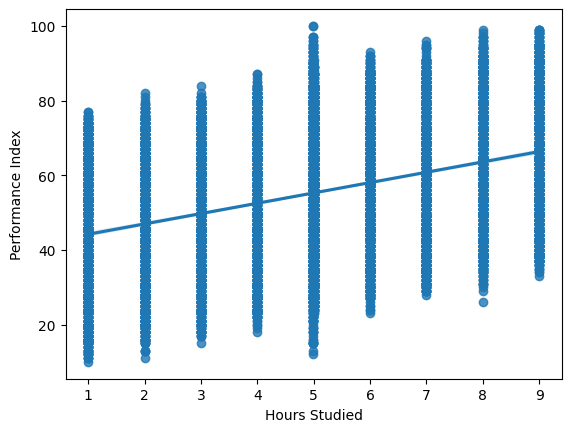

In [129]:
sns.regplot(x='Hours Studied', y='Performance Index', data=df)

In [130]:
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

In [131]:
print(X)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0               7.0        99.000000                        Yes     9.000000   
1               4.0        82.000000                         No     4.000000   
2               8.0        51.000000                        Yes     7.000000   
3               5.0        52.000000                        Yes     5.000000   
4               7.0        69.448995                         No     8.000000   
...             ...              ...                        ...          ...   
9995            1.0        49.000000                        Yes     4.000000   
9996            7.0        64.000000                        Yes     8.000000   
9997            6.0        83.000000                        NaN     8.000000   
9998            9.0        97.000000                        Yes     6.532169   
9999            7.0        74.000000                         No     6.532169   

      Sample Question Papers Practiced 

In [132]:
print(y)

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997     NaN
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64


In [133]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

    column selection

In [134]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['number']).columns

In [135]:
num_pipeline = Pipeline(
    steps = (
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ) 
)

In [136]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

In [137]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

In [138]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)

    to IMPLEMENT PREPROCESSING AND TRAINING MODEL AT THE SAME TIME

In [139]:
model = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('lr', LinearRegression())
    ]
)

In [140]:
model.fit(Xtrain, ytrain)

ValueError: Input y contains NaN.